# Gaussian Naive Bayes 

A Gaussian Naive Bayes algorithm is a special type of NB algorithm. It’s specifically used when the features have continuous values. It’s also assumed that all the features are following a gaussian distribution i.e, normal distribution.

# Dataset Prima Indian Diabetes
To predict the outcome of having diabetes or not given various attributes



In [1]:
# importing diiferent libraries
import pandas as pd
from sklearn.linear_model import LogisticRegression

# importing ploting libraries
import matplotlib.pyplot as plt   

#importing seaborn for statistical plots
import seaborn as sns

#Let us break the X and y dataframes into training set and test set. For this we will use
#Sklearn package's data splitting function which is based on random function

from sklearn.model_selection import train_test_split

import numpy as np
# import Gaussian Naive Bayes libraries 
from sklearn.naive_bayes import GaussianNB


# calculate accuracy measures and confusion matrix
from sklearn import metrics
from sklearn.metrics import accuracy_score

# getting plot on jupyter notebook
%matplotlib inline

In [2]:
data = pd.read_csv('pima-indians-diabetes_3.csv')
df = data.copy()

In [3]:
data.head()

,Preg,Plas,Pres,skin,test,mass,pedi,age,class
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [4]:
data.tail()

,Preg,Plas,Pres,skin,test,mass,pedi,age,class
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1
767,1,93,70,31,0,30.4,0.315,23,0


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
Preg     768 non-null int64
Plas     768 non-null int64
Pres     768 non-null int64
skin     768 non-null int64
test     768 non-null int64
mass     768 non-null float64
pedi     768 non-null float64
age      768 non-null int64
class    768 non-null int64
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [6]:
# Total 768 entries amoung 9 columns 
# no null entries and no categorical entries
# the column 'class' is the outcome which tells whether diabetic or not diabetic it has 0 as Non Diabetic and 1 as Diabetic

In [7]:
data.describe(include='all')

,Preg,Plas,Pres,skin,test,mass,pedi,age,class
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [8]:
# There seems to be missing data which are replaced by zero's in the dataset example pressure,plasma,skin,insulin test,mass
# Repplacing zero missing value with the mean
for i in data.columns:
    if i in ['Pres','Plas','skin','test','mass']:
        
        data[i] = data[i].replace(0,data[i].mean())
data.describe()

        

    
    




,Preg,Plas,Pres,skin,test,mass,pedi,age,class
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,121.681605,72.254807,26.606479,118.660163,32.450805,0.471876,33.240885,0.348958
std,3.369578,30.436016,12.115932,9.631241,93.080358,6.875374,0.331329,11.760232,0.476951
min,0.000000,44.000000,24.000000,7.000000,14.000000,18.200000,0.078000,21.000000,0.000000
25%,1.000000,99.750000,64.000000,20.536458,79.799479,27.500000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,79.799479,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


C:\Users\ttc\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval
C:\Users\ttc\Anaconda3\lib\site-packages\statsmodels\nonparametric\kde.py:488: RuntimeWarning: invalid value encountered in true_divide
  binned = fast_linbin(X, a, b, gridsize) / (delta * nobs)
C:\Users\ttc\Anaconda3\lib\site-packages\statsmodels\nonparametric\kdetools.py:34: RuntimeWarning: invalid value encountered in double_scalars
  FAC1 = 2*(np.pi*bw/RANGE)**2
C:\Users\ttc\Anaconda3\lib\site-packages\numpy\core\fromnumeric.py:83: RuntimeWarning: invalid value encountered in reduce
  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)


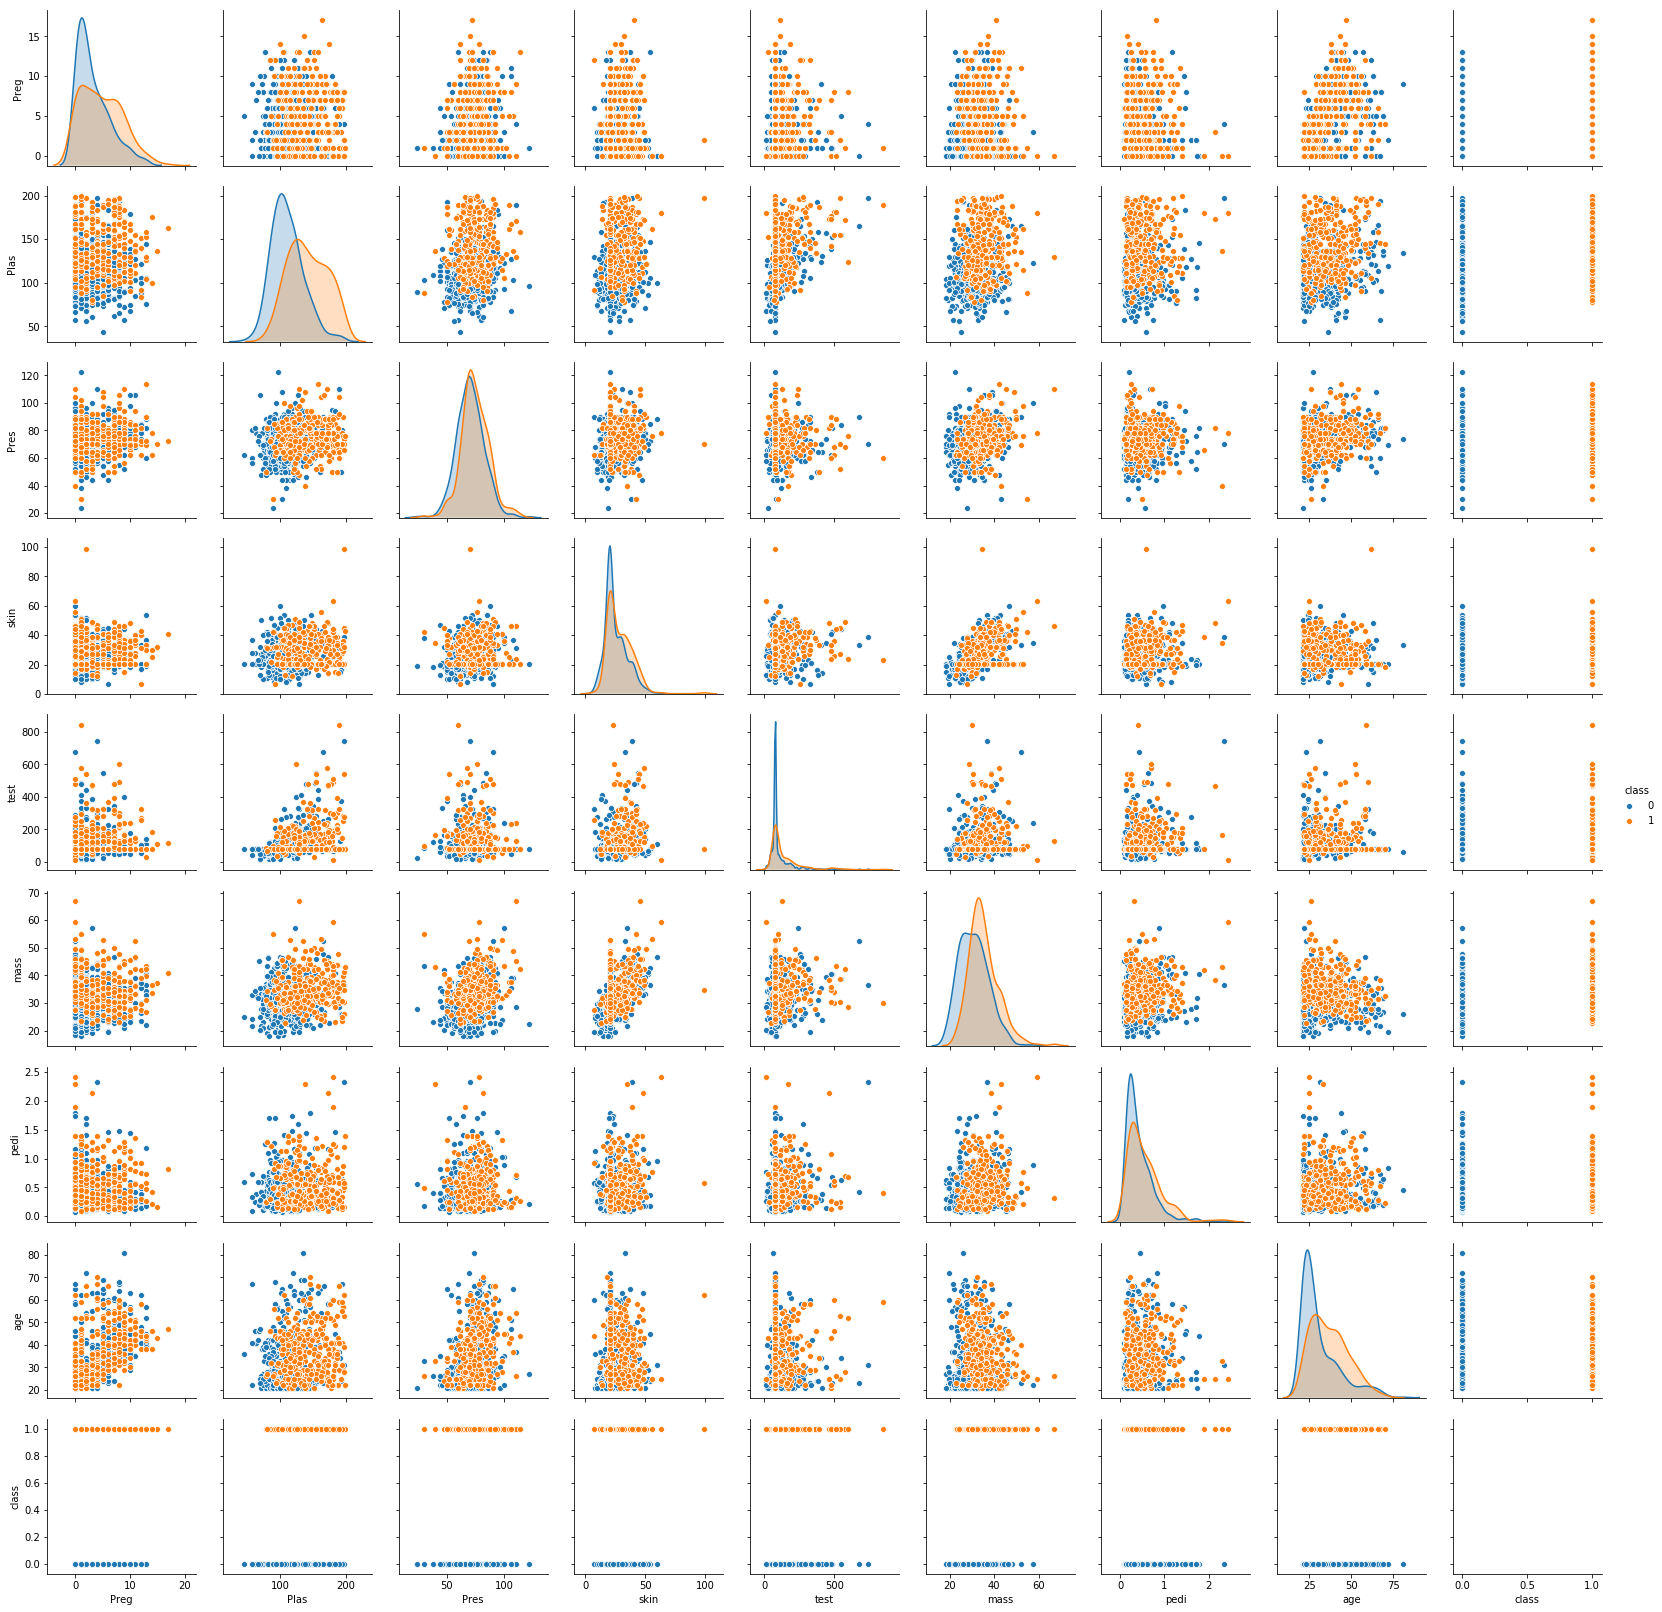

In [9]:
sns.pairplot(data,hue='class')

No correlation is observed between the attributes except skin and mass which may have a linear correlation between them

Also the distribution for mass is normal.

Pressure and Skin Thickness are left schewed
Preg , Plasma , Test Pedigree and age are right schewed


In [10]:
# Let us look at the target column which is 'class' to understand how the data is distributed amongst the various values
data.groupby(["class"]).count()

# Most are not diabetic. The ratio is almost 1:2 in favor or class 0.  The model's ability to predict class 0 will 
# be better than predicting class 1. 

,Preg,Plas,Pres,skin,test,mass,pedi,age
class,,,,,,,,
0,500,500,500,500,500,500,500,500
1,268,268,268,268,268,268,268,268


In [11]:
array = data.values
X = data.iloc[:,0:8]
y = data.iloc[:,8]
#X = array[:,0:8] # select all rows and first 8 columns which are the attributes
#Y = array[:,8]   # select all rows and the 8th column which is the classification "Yes", "No" for diabeties
test_size = 0.30 # taking 70:30 training and test set
seed =1 # Random numbmer seeding for reapeatability of the code
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=test_size, random_state=seed)

In [12]:
# making Gaussian Naive Bayes prediction
clf = GaussianNB()
clf.fit(X_train,y_train)
y_pred = clf.predict(X_test)

In [13]:
# Finding the accuracy of the prediction
accuracy_score(y_test, y_pred, normalize = True)

# accuracy is 77 % which says we are 77 % confident in predicting the class 

0.7705627705627706

In [14]:
# Finding confusion matrix
print(metrics.confusion_matrix(y_test, y_pred))

[[123  23]
 [ 30  55]]


In [15]:
pd.crosstab(y_test, y_pred, rownames=['True'], colnames=['Predicted'], margins=True)

Predicted,0,1,All
True,,,
0,123,23,146
1,30,55,85
All,153,78,231


# Analyzing the confusion matrix
# True Positives (TP): we correctly predicted that they don't have diabetes 123
# True Negatives (TN): we correctly predicted that they do have diabetes 55
# False Positives (FP): we incorrectly predicted that they don't have diabetes (a   "Type I error") 30 Falsely predict positive Type I error
# False Negatives (FN): we incorrectly predicted that they do have diabetes (a "Type II error") 23 Falsely predict negative Type II error

In [16]:
# Classification report for precision and recall
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.80      0.84      0.82       146
           1       0.71      0.65      0.67        85

   micro avg       0.77      0.77      0.77       231
   macro avg       0.75      0.74      0.75       231
weighted avg       0.77      0.77      0.77       231



# Precision for class 0 is 80 % and for class 1 is 71 % . It means the using GNB the prediction for class 0 is more than class 1 which was obvious as we have 1:2 ration in favour of class 0
# The weighted average shows the accuracy in predicting  which is 77%.
# Also the model calculates 84 % of time correctly for class 0 as can be seen in recall and 65 % correct in predicting class 1 


# Standardization of Data
All the data values of our dataframe are numeric. Now, we need to convert them on a single scale. We can standardize the values.  We can use the below formula for standardization.

{x}_i = {{x}_i - mean(x)} {sigma(x)}

In [17]:
num_features = ['Preg', 'Plas', 'Pres', 'skin', 'test', 'mass', 'pedi', 'age']
scaled_features = {}
for each in num_features:
    mean, std = df[each].mean(), df[each].std()
    scaled_features[each] = [mean, std]
    df.loc[:, each] = (df[each] - mean)/std

In [18]:
features = df.values[:,:8]
target = df.values[:,8]
features_train, features_test, target_train, target_test = train_test_split(features,
                                                                            target, test_size = 0.33, random_state = 10)

In [19]:
# making Gaussian Naive Bayes prediction
clf = GaussianNB()
clf.fit(features_train,target_train)
features_pred = clf.predict(features_test)

In [20]:
# Finding the accuracy of the prediction
accuracy_score(target_test, features_pred, normalize = True)

0.7362204724409449

In [21]:
print(metrics.confusion_matrix(target_test, features_pred))

[[139  23]
 [ 44  48]]


In [22]:
pd.crosstab(target_test, features_pred, rownames=['True'], colnames=['Predicted'], margins=True)

Predicted,0.0,1.0,All
True,,,
0.0,139,23,162
1.0,44,48,92
All,183,71,254


# Analyzing the confusion matrix
# True Positives (TP): we correctly predicted that they don't have have diabetes 139
# True Negatives (TN): we correctly predicted that they do have diabetes 48
# False Positives (FP): we incorrectly predicted that they don't have diabetes (a   "Type I error") 44 Falsely predict positive Type I error
# False Negatives (FN): we incorrectly predicted that they do have diabetes (a "Type II error") 23 Falsely predict negative Type II error

In [23]:
# Classification report for precision and recall
from sklearn.metrics import classification_report
print(classification_report(target_test, features_pred))

              precision    recall  f1-score   support

         0.0       0.76      0.86      0.81       162
         1.0       0.68      0.52      0.59        92

   micro avg       0.74      0.74      0.74       254
   macro avg       0.72      0.69      0.70       254
weighted avg       0.73      0.74      0.73       254



# After scaling of data the accuracy is lower i.e 73 %

# The prediction for class 0 and 1 is lower as compare to normal data 76 for class 0 as compare to 80 and 68% for class 1 as compare to 81% .

# The correct prediction (recall ) is higher in class 0 and lower in class 1 as compare to the data when no scaling was done. 

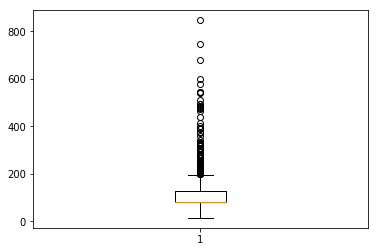

In [27]:
fig = plt.figure()
ax = fig.add_subplot(111)
res = ax.boxplot(data.test)
plt.show()

In [99]:
# Finding IQR for filtering outliers in dataset 
Q1 = data.quantile(0.25)
Q3 = data.quantile(0.75)
IQR = Q3 - Q1
data_out = data[~((data < (Q1 - 1.5 * IQR)) |(data > (Q3 + 1.5 * IQR))).any(axis=1)]
# No of records after removing outliers
data_out.shape

(619, 9)

In [100]:
# Splitting the filtered data into training and test set
array = data_out.values
X = data_out.iloc[:,0:8]
y = data_out.iloc[:,8]
#X = array[:,0:8] # select all rows and first 8 columns which are the attributes
#Y = array[:,8]   # select all rows and the 8th column which is the classification "Yes", "No" for diabeties
test_size = 0.30 # taking 70:30 training and test set
seed =1 # Random numbmer seeding for reapeatability of the code
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=test_size, random_state=seed)

In [101]:
# making Gaussian Naive Bayes prediction
clf = GaussianNB()
clf.fit(X_train,y_train)
y_pred = clf.predict(X_test)

In [102]:
print(accuracy_score(y_test,y_pred))

0.7688172043010753


In [103]:
# Finding confusion matrix
print(metrics.confusion_matrix(y_test, y_pred))

[[107  20]
 [ 23  36]]


In [104]:
# Classification report for precision and recall
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.82      0.84      0.83       127
           1       0.64      0.61      0.63        59

   micro avg       0.77      0.77      0.77       186
   macro avg       0.73      0.73      0.73       186
weighted avg       0.77      0.77      0.77       186



In [116]:
pd.crosstab(y_test, y_pred, rownames=['True'], colnames=['Predicted'], margins=True)

Predicted,0,1,All
True,,,
0,107,20,127
1,23,36,59
All,130,56,186


In [117]:
# The accuracy for the model is 77 % per after managing outliers based on IQR
# The confusion matrix show that with 82 % the model has correctly predicted no diabeties when actually the person is non diabetic
# The confusion matrix show that with 64 % the model has correctly predicted  diabeties when actually the person is diabetic
# True Positives (TP): we correctly predicted that they don't have have diabetes 107
# True Negatives (TN): we correctly predicted that they do have diabetes 36
# False Positives (FP): we incorrectly predicted that they don't have diabetes (a   "Type I error") 23 Falsely predict positive Type I error
# False Negatives (FN): we incorrectly predicted that they do have diabetes (a "Type II error") 20 Falsely predict negative Type II error